<a href="https://colab.research.google.com/github/Rushi356/News-Classification/blob/main/News_Word2Vec_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import Word2Vec
import re
import nltk
from nltk.corpus import stopwords

## Importing Data

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Data_Test.xlsx')

In [3]:
df_train.head(2)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0


In [4]:
df_test.head(2)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...


## Exploratory Data Analysis

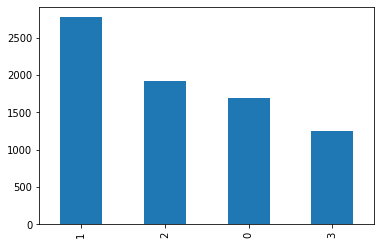

In [5]:
df_train.SECTION.value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7f6a0da0bd90>,
 [Text(0.8837187075045893, 0.7358948607011865, 'politics'),
  Text(-0.9418135236263131, 0.6599146056230217, 'technology'),
  Text(-0.2822116459196093, -1.1148347800940483, 'entertainment'),
  Text(1.001874170217926, -0.5645778485294501, 'business')],
 [Text(0.4994931825025939, 0.41594057343980095, '22.1%'),
  Text(-0.5323293829192204, 0.37299521187388185, '36.3%'),
  Text(-0.15951093030238783, -0.6301240061401143, '25.2%'),
  Text(0.5662767049057842, -0.31910921873403697, '16.3%')])

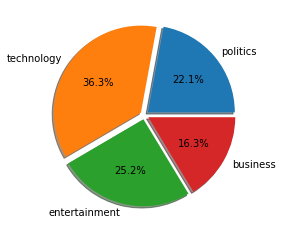

In [52]:
politics = df_train[df_train['SECTION'] == 0]
technology = df_train[df_train['SECTION'] == 1]
entertainment = df_train[df_train['SECTION'] == 2]
business = df_train[df_train['SECTION'] == 3]
count = [politics['SECTION'].count(),technology['SECTION'].count(),entertainment['SECTION'].count(),business['SECTION'].count()]
plt.pie(count,labels=['politics','technology','entertainment','business'],
       explode = (0.05, 0.05, 0.05, 0.05),shadow = True,autopct = "%1.1f%%")

In [6]:
df_train.shape

(7628, 2)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [8]:
total_len = len(df_train)
politics_len = len(df_train[df_train.SECTION == 0])
tech_len = len(df_train[df_train.SECTION == 1])
enter_len = len(df_train[df_train.SECTION == 2])
buss_len = len(df_train[df_train.SECTION == 3])

pol = 100*(politics_len/total_len)
tech = 100*(tech_len/total_len)
enter = 100*(enter_len/total_len)
buss = 100*(buss_len/total_len)
print(f'percentage of politics news: {pol}')
print(f'percentage of technoglogy news: {tech}')
print(f'percentage of entertenment news: {enter}')
print(f'percentage of bussiness news: {buss}')

percentage of politics news: 22.10277923439958
percentage of technoglogy news: 36.33980073413739
percentage of entertenment news: 25.222863135815416
percentage of bussiness news: 16.334556895647616


## Cleaning the text

1. Removing the special characters
2. Lowering the text.
3. Lemmatization
4. Removing the stop words

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def text_preprocessing(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [wl.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [11]:
df_train['STORY'] = df_train['STORY'].apply(text_preprocessing)
df_test['STORY'] = df_test['STORY'].apply(text_preprocessing)

In [12]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Creating Word Cloud for Differant Section of News

### Politics

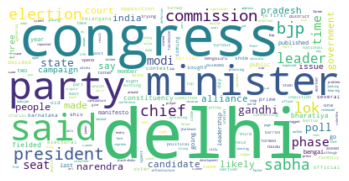

In [53]:
from wordcloud import WordCloud
politics_text = ' '.join(cat.split()[1] for cat in politics['STORY'])
politics_cloud = WordCloud(collocations = False, background_color = 'white').generate(politics_text)
plt.imshow(politics_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Technology

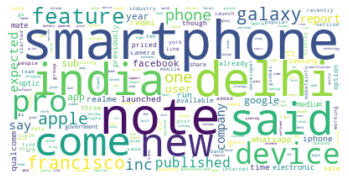

In [54]:
#from wordcloud import WordCloud
technology_text = ' '.join(cat.split()[1] for cat in technology['STORY'])
technology_cloud = WordCloud(collocations = False, background_color = 'white').generate(technology_text)
plt.imshow(technology_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Entertainment

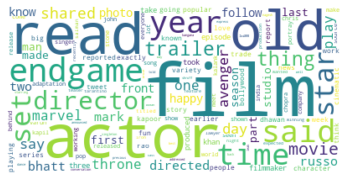

In [55]:
#from wordcloud import WordCloud
entertainment_text = ' '.join(cat.split()[1] for cat in entertainment['STORY'])
entertainment_cloud = WordCloud(collocations = False, background_color = 'white').generate(entertainment_text)
plt.imshow(entertainment_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Business

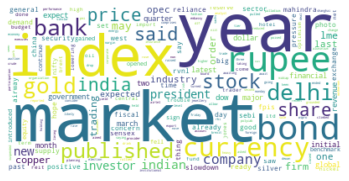

In [56]:
#from wordcloud import WordCloud
business_text = ' '.join(cat.split()[1] for cat in business['STORY'])
business_cloud = WordCloud(collocations = False, background_color = 'white').generate(business_text)
plt.imshow(business_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Training data
lst_story = []
for line in df_train['STORY']:
  tokens = word_tokenize(line)
  lst_story.append(tokens)

# Testing data
lst_story_test = []
for line in df_test['STORY']:
  tokens = word_tokenize(line)
  lst_story_test.append(tokens)

## Training Word2vec Model using Training data

In [16]:
EMBEDDING_DIM = 100
# train word2vec model
model_wv = gensim.models.Word2Vec(sentences=lst_story,size=EMBEDDING_DIM,window=5,workers=4,min_count=1)

# vocab size
words = list(model_wv.wv.vocab)
print(f'vocabulory size: {len(words)}')

vocabulory size: 27805


In [17]:
# Save model in ASCII format
filename = 'news_cat_w2v.txt'
model_wv.wv.save_word2vec_format(filename,binary=False)

In [18]:
model_wv.wv.most_similar('king')

[('singing', 0.9987906217575073),
 ('stark', 0.9987484216690063),
 ('rogers', 0.9986076951026917),
 ('loki', 0.998601496219635),
 ('drama', 0.9982171058654785),
 ('cersei', 0.9980629682540894),
 ('reprise', 0.9980546236038208),
 ('jaime', 0.9980323314666748),
 ('bruce', 0.9979766607284546),
 ('beautiful', 0.9978768229484558)]

In [28]:
#Extracting the word embedding from stores file.
import os
embedding_index = {}
f = open(os.path.join('','news_cat_w2v.txt'),encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embedding_index[word] = coefs
f.close()

In [29]:
max_len = max([len(s) for s in lst_story])
max_len

570

In [30]:
# vectorize the text samples into 2D integer tensor
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(lst_story)
sequences = tokenizer_obj.texts_to_sequences(lst_story)

# pad sequences
word_index = tokenizer_obj.word_index
story_pad = pad_sequences(sequences,maxlen=max_len)
section = df_train['SECTION'].values
print('shape of story tensor:',story_pad.shape)
print('shape of section tensor:',section.shape)

shape of story tensor: (7628, 570)
shape of section tensor: (7628,)


In [32]:
len(word_index)

27805

In [34]:
# spliting data into training and validation set
indices = np.arange(story_pad.shape[0])
np.random.shuffle(indices)
story_pad = story_pad[indices]
section = section[indices]
num_validation_sample = int(VALIDATION_SPLIT*story_pad.shape[0])
X_train = story_pad[:-num_validation_sample]
X_test = story_pad[-num_validation_sample:]
y_train = section[:-num_validation_sample]
y_test = section[-num_validation_sample:]

In [35]:
from keras.utils import np_utils

y_train_en = np_utils.to_categorical(y_train)
y_test_en = np_utils.to_categorical(y_test)

In [36]:
print('shape of X_train tensor',X_train.shape)
print('shape of X_test tensor',X_test.shape)
print('shape of y_train tensor',y_train_en.shape)
print('shape of y_test tensor',y_test_en.shape)

shape of X_train tensor (6103, 570)
shape of X_test tensor (1525, 570)
shape of y_train tensor (6103, 4)
shape of y_test tensor (1525, 4)


In [40]:
type(word_index)

dict

In [41]:
EMBEDDING_DIM = 100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [42]:
embedding_matrix.shape

(27806, 100)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM
from keras.initializers import constant
from keras.layers.embeddings import Embedding

### Creating LSTM Model

In [44]:
# Define Model
model_nn = Sequential()

embedding_layer = Embedding(num_words,EMBEDDING_DIM,
                            embeddings_initializer=constant(embedding_matrix),
                            input_length=max_len,
                            trainable=False)

model_nn.add(embedding_layer)
model_nn.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model_nn.add(Dense(4,activation='softmax'))

model_nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 570, 100)          2780600   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 2,898,364
Trainable params: 117,764
Non-trainable params: 2,780,600
_________________________________________________________________
None


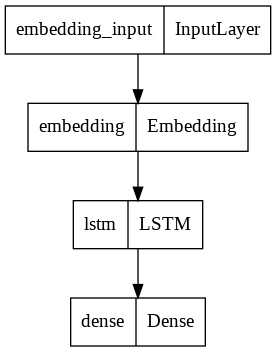

In [45]:
import tensorflow as tf
tf.keras.utils.plot_model(model_nn)

In [46]:
clf_model = model_nn.fit(X_train,y_train_en,batch_size=128,epochs=5,validation_split=0.2,verbose=2)

Epoch 1/5
39/39 - 118s - loss: 0.5470 - accuracy: 0.7939 - val_loss: 0.2605 - val_accuracy: 0.9206 - 118s/epoch - 3s/step
Epoch 2/5
39/39 - 114s - loss: 0.2706 - accuracy: 0.9195 - val_loss: 0.2169 - val_accuracy: 0.9353 - 114s/epoch - 3s/step
Epoch 3/5
39/39 - 113s - loss: 0.2213 - accuracy: 0.9299 - val_loss: 0.2254 - val_accuracy: 0.9320 - 113s/epoch - 3s/step
Epoch 4/5
39/39 - 132s - loss: 0.2254 - accuracy: 0.9232 - val_loss: 0.2133 - val_accuracy: 0.9369 - 132s/epoch - 3s/step
Epoch 5/5
39/39 - 115s - loss: 0.2013 - accuracy: 0.9314 - val_loss: 0.1940 - val_accuracy: 0.9345 - 115s/epoch - 3s/step


In [58]:
loss, accuracy = model_nn.evaluate(X_test,y_test_en,batch_size=128)

12/12 [==============================] - 3s 208ms/step - loss: 0.1656 - accuracy: 0.9449


In [59]:
y_pred = model_nn.predict(X_test)

In [65]:
X_test[1].shape

(570,)

In [69]:
pred = model_nn.predict(X_test[0:1])
pred = pred.round()
pred

array([[0., 1., 0., 0.]], dtype=float32)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test_en,y_pred.round()))
print(classification_report(y_test_en,y_pred.round()))

0.9383606557377049
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       311
           1       0.94      0.96      0.95       535
           2       0.95      0.95      0.95       397
           3       0.98      0.88      0.92       282

   micro avg       0.95      0.94      0.95      1525
   macro avg       0.96      0.93      0.94      1525
weighted avg       0.95      0.94      0.95      1525
 samples avg       0.94      0.94      0.94      1525



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot the accuracy and loss over time

In [50]:
history_dict = clf_model.history
history_dict

{'accuracy': [0.7939369082450867,
  0.9195002317428589,
  0.9299467206001282,
  0.9231871962547302,
  0.931380569934845],
 'loss': [0.547014057636261,
  0.2706396281719208,
  0.2213040441274643,
  0.22536484897136688,
  0.20129165053367615],
 'val_accuracy': [0.920556902885437,
  0.9352989196777344,
  0.9320229291915894,
  0.9369369149208069,
  0.9344799518585205],
 'val_loss': [0.2605070173740387,
  0.21687020361423492,
  0.2253904640674591,
  0.21327048540115356,
  0.1940297931432724]}

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


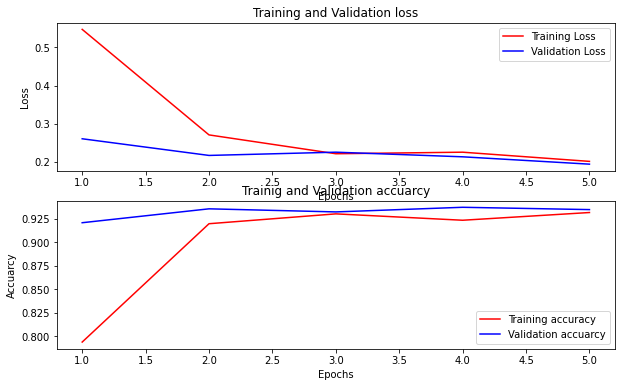

In [51]:
history_dict = clf_model.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10,6))
fig.tight_layout(pad=2.0)

plt.subplot(2, 1, 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuarcy')
plt.title('Trainig and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend(loc='lower right')

In [71]:
## Tokenizing and padding the test data
tokenizer_obj.fit_on_texts(lst_story_test)
sequences_test = tokenizer_obj.texts_to_sequences(lst_story_test)
story_pad_test = pad_sequences(sequences_test,maxlen=max_len)
print('shape of test story',story_pad_test.shape)

shape of test story (2748, 570)


In [72]:
y_pred_test_data = model_nn.predict(story_pad_test)

In [ ]:
import pickle
filename = 'news.pkl'
pickle.dump(model_nn,open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://ac8786d2-252f-4ca2-a323-2f441eeed333/assets


In [ ]:
model_nn.save('news_cat.h5')